In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
# Step1: Import the required libraries

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

In [ ]:
#df = yf.download('BTC-USD (8)')

In [ ]:
#Phase 1 of the project
#Step2: Loading of required dataset
#bitcoin dataset timeperiod: Jan 01, 2017 - Apr 23, 2023 (nearly 6 years)
from google.colab import files


uploaded = files.upload()


Saving BTC-USD (9).csv to BTC-USD (9) (1).csv


In [ ]:
#using pandas for reading csv files
#maindf will read the data from csv and will store it
import io
df = pd.read_csv(io.BytesIO(uploaded['BTC-USD (9).csv']))

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-02,36699.921875,38231.339844,35966.308594,37575.179688,37575.179688,33070867190
1,2021-06-03,37599.410156,39478.953125,37243.972656,39208.765625,39208.765625,35460750427
2,2021-06-04,39242.484375,39242.484375,35717.722656,36894.406250,36894.406250,41831090187
3,2021-06-05,36880.156250,37917.714844,34900.414063,35551.957031,35551.957031,35959473399
4,2021-06-06,35538.609375,36436.421875,35304.578125,35862.378906,35862.378906,28913440585
...,...,...,...,...,...,...,...
726,2023-05-29,28075.591797,28432.039063,27563.876953,27745.884766,27745.884766,15181308984
727,2023-05-30,27745.123047,28044.759766,27588.501953,27702.349609,27702.349609,13251081851
728,2023-05-31,27700.529297,27831.677734,26866.453125,27219.658203,27219.658203,15656371534
729,2023-06-01,27218.412109,27346.105469,26671.720703,26819.972656,26819.972656,14678970415


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
#import pandas.util.testing as tm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

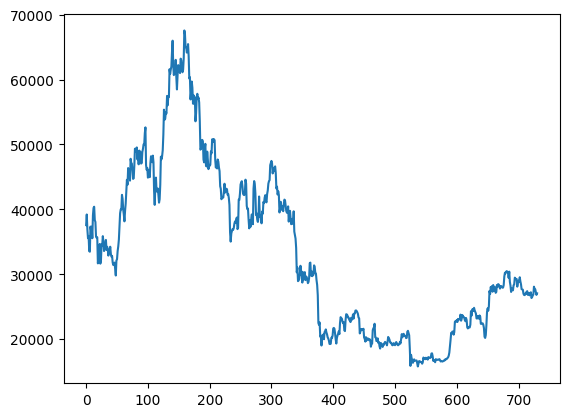

In [ ]:
plt.plot(df.index, df['Adj Close'])
plt.show()

**80% Training , 20% Testing**

In [ ]:
#Train Test Split

to_row = int(len(df)*0.8) #80% Training dataset,20% Testing Dataset

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])


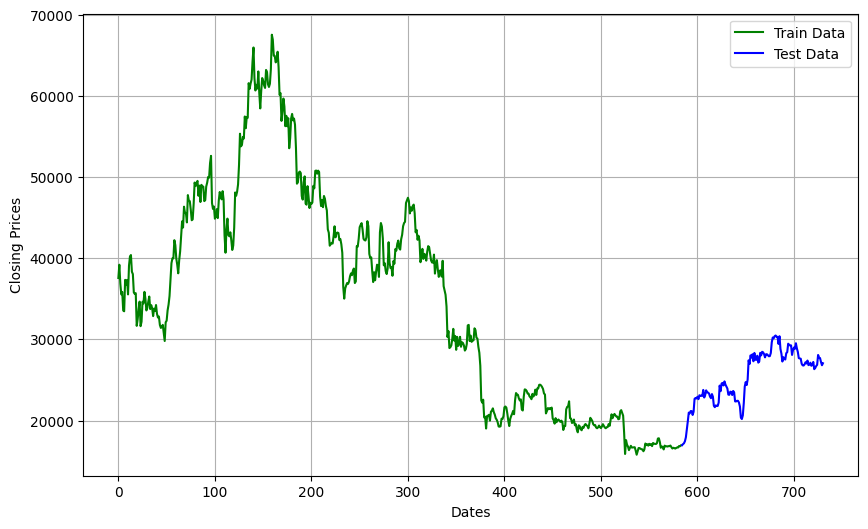

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test Data')
plt.legend()

In [ ]:
model_predictions = []
n_test_obser = len(testing_data)

**ARIMA MODEL**

In [ ]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0)) #p,q,d
  model_fit = model.fit()
  yhat = model_fit.forecast()
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  730
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -6194.936
Date:                Fri, 02 Jun 2023   AIC                          12399.872
Time:                        13:13:40   BIC                          12422.831
Sample:                             0   HQIC                         12408.731
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0330      0.031      1.082      0.279      -0.027       0.093
ar.L2         -0.0809      0.031     -2.635      0.008      -0.141      -0.021
ar.L3         -0.0118      0.033     -0.360      0.7

In [ ]:
len(model_predictions)

147

In [ ]:
len(testing_data)

147

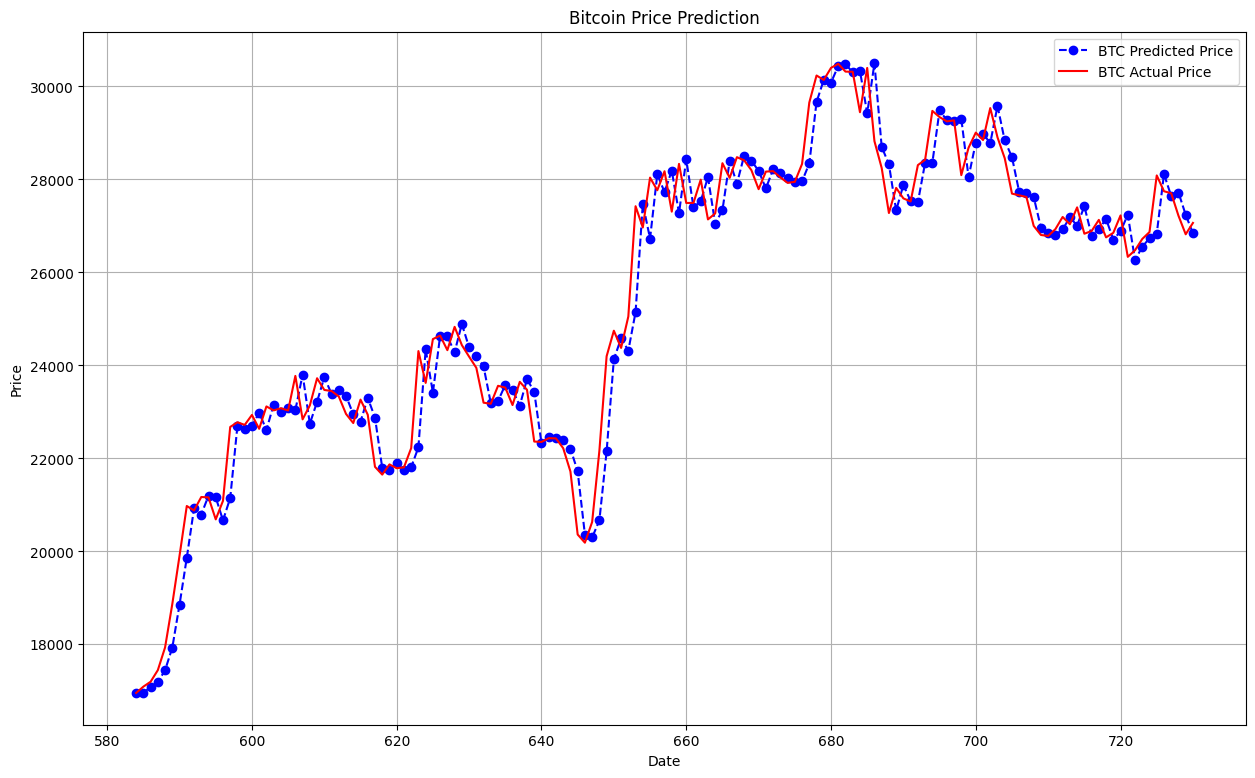

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC Predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### **EVALUATION METRICES RMSE,MSE and MAE for ARIMA**

In [ ]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(testing_data,model_predictions)))
print("Test data MSE: ", mean_squared_error(testing_data,model_predictions))
print("Test data MAE: ", mean_absolute_error(testing_data,model_predictions))

Test data RMSE:  646.0762687655852
Test data MSE:  417414.5450620606
Test data MAE:  461.54755607288337


In [ ]:
#report performance
# mape = np.mean(np.abs(np.array(model_predictions[:-1]) - np.array(testing_data))/np.abs(testing_data))
mape = np.round(np.mean(np.abs((np.array(model_predictions[:-1]) - np.array(testing_data)) / np.abs(testing_data)) * 100), 4)
print('Result Mean Absolute Percentage Error Prediction Model : '+str(mape)+'%') #Mean Absolute Percentage Error

# Around 3.8% MAPE(Mean Absolute Percentage Error) implies the model is about 96.2% accurate in predicting the test set observations.

Result Mean Absolute Percentage Error Prediction Model : 15.0443%
